In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import Normalizer, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


customer_agg = pd.read_csv('C:/Users/User/Desktop/Week-2/notebooks/customer_aggregated_data.csv')

engagement_features = customer_agg[['TCP_retransmission', 'RTT', 'throughput']]

scaler = StandardScaler()
scaled_engagement_features = scaler.fit_transform(engagement_features)

kmeans_engagement = KMeans(n_clusters=3, random_state=42)
customer_agg['Engagement_Cluster'] = kmeans_engagement.fit_predict(scaled_engagement_features)

engagement_centroids = kmeans_engagement.cluster_centers_

engagement_centroids = scaler.inverse_transform(engagement_centroids)

engagement_centroids_customer_agg = pd.DataFrame(engagement_centroids, columns=['TCP_retransmission', 'RTT', 'throughput'])
engagement_centroids_customer_agg['cluster_id'] = range(len(engagement_centroids))
engagement_centroids_customer_agg.to_csv('engagement_clusters.csv', index=False)


In [59]:
experience_features = customer_agg[['TCP_retransmission', 'RTT', 'throughput']]

scaled_experience_features = scaler.transform(experience_features)

kmeans_experience = KMeans(n_clusters=3, random_state=42)
customer_agg['Experience_Cluster'] = kmeans_experience.fit_predict(scaled_experience_features)

experience_centroids = kmeans_experience.cluster_centers_

experience_centroids = scaler.inverse_transform(experience_centroids)

experience_centroids_customer_agg = pd.DataFrame(experience_centroids, columns=['TCP_retransmission', 'RTT', 'throughput'])
experience_centroids_customer_agg['cluster_id'] = range(len(experience_centroids))
experience_centroids_customer_agg.to_csv('experience_clusters.csv', index=False)


<span style="font-size: 36px;">Task 4.1</span>

In [60]:
engagement_centroids = pd.read_csv('engagement_clusters.csv')
experience_centroids = pd.read_csv('experience_clusters.csv')

less_engaged_cluster = 0  
worst_experience_cluster = 2  

less_engaged_centroid = engagement_centroids.loc[engagement_centroids['cluster_id'] == less_engaged_cluster].drop(columns='cluster_id').values.flatten()
worst_experience_centroid = experience_centroids.loc[experience_centroids['cluster_id'] == worst_experience_cluster].drop(columns='cluster_id').values.flatten()

def calculate_score(row, centroid):
    return euclidean(row, centroid)

customer_agg['engagement_score'] = customer_agg[['TCP_retransmission', 'RTT', 'throughput']].apply(lambda row: calculate_score(row, less_engaged_centroid), axis=1)
customer_agg['experience_score'] = customer_agg[['TCP_retransmission', 'RTT', 'throughput']].apply(lambda row: calculate_score(row, worst_experience_centroid), axis=1)

customer_agg['satisfaction_score'] = (customer_agg['engagement_score'] + customer_agg['experience_score']) / 2

print(customer_agg[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']])



        MSISDN/Number  engagement_score  experience_score  satisfaction_score
0        3.360100e+10      6.150567e+06      7.272307e+06        6.711437e+06
1        3.360100e+10      6.150567e+06      7.272307e+06        6.711437e+06
2        3.360100e+10      6.150567e+06      7.272307e+06        6.711437e+06
3        3.360101e+10      4.253860e+06      3.132209e+06        3.693035e+06
4        3.360101e+10      3.100898e+06      4.222598e+06        3.661748e+06
...               ...               ...               ...                 ...
106851   3.379000e+10      4.525198e+06      3.403518e+06        3.964358e+06
106852   3.379000e+10      6.150567e+06      7.272307e+06        6.711437e+06
106853   3.197021e+12      6.150567e+06      7.272307e+06        6.711437e+06
106854   3.370000e+14      6.150567e+06      7.272307e+06        6.711437e+06
106855   8.823971e+14      6.150567e+06      7.272307e+06        6.711437e+06

[106856 rows x 4 columns]


<span style="font-size: 36px;">Task 4.2</span>

In [61]:
user_scores = pd.read_csv('C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source_cleaned.csv')

user_scores['engagement_score'] = (user_scores['social_media_dl_(bytes)'] + 
                                    user_scores['google_dl_(bytes)'] + 
                                    user_scores['email_dl_(bytes)'] + 
                                    user_scores['youtube_dl_(bytes)'] + 
                                    user_scores['netflix_dl_(bytes)'] + 
                                    user_scores['gaming_dl_(bytes)'] + 
                                    user_scores['other_dl_(bytes)'])

user_scores['experience_score'] = (user_scores['avg_bearer_tp_dl_(kbps)'] - 
                                    user_scores['avg_rtt_dl_(ms)'])  # Simple example

user_scores['satisfaction_score'] = (user_scores['engagement_score'] + user_scores['experience_score']) / 2

top_10_satisfied = user_scores.nlargest(10, 'satisfaction_score')

print(top_10_satisfied[['bearer_id', 'satisfaction_score']])


          bearer_id  satisfaction_score
3484   7.277826e+18         860409912.5
13330  7.277826e+18         858767523.5
1088   1.304243e+19         856044013.5
290    1.304243e+19         854750593.5
3731   1.304243e+19         852049470.0
10207  1.304243e+19         851051619.5
9499   1.304243e+19         848894767.0
12304  7.277826e+18         844423219.0
11097  1.304243e+19         844046078.0
4778   1.304243e+19         843055114.0


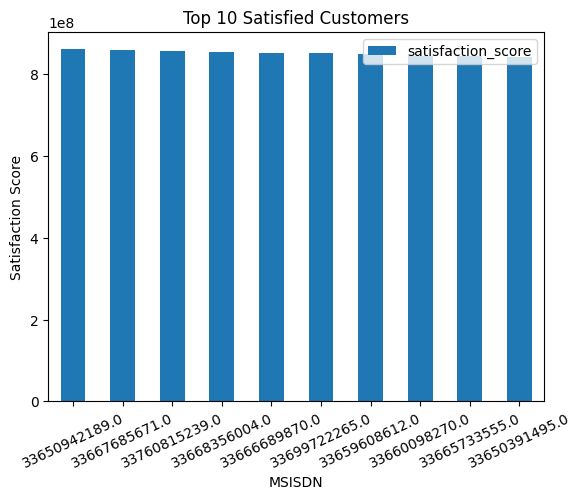

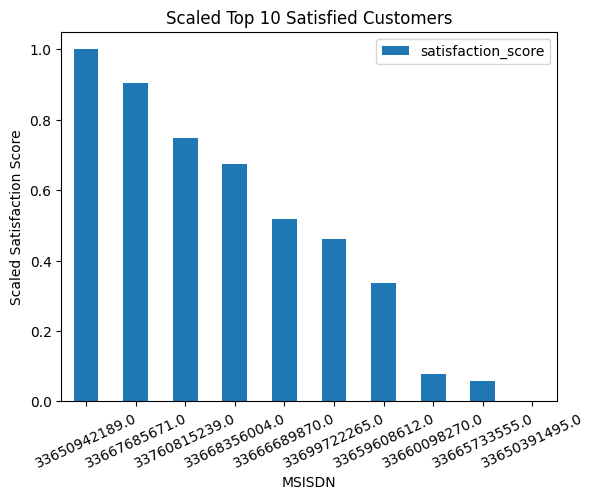

In [71]:
if 'satisfaction_score' in user_scores.columns:
    def normalizer(customer_agg, columns):
        norm = Normalizer()
        return pd.DataFrame(norm.fit_transform(customer_agg), columns=columns)

    def scaler(customer_agg, columns):
        minmax_scaler = MinMaxScaler()
        return pd.DataFrame(minmax_scaler.fit_transform(customer_agg), columns=columns)

    def scale_and_normalize(customer_agg, columns):
        return normalizer(scaler(customer_agg, columns), columns)

    top_10_satisfied = user_scores.sort_values(by=['satisfaction_score'], ascending=False).head(10)

    scaled_top_score = scaler(top_10_satisfied[['satisfaction_score']], ['satisfaction_score'])
    scaled_top_score['msisdn'] = top_10_satisfied['msisdn/number'].to_list()  # Correct column name

    top_10_satisfied.plot(kind="bar", x='msisdn/number', y='satisfaction_score', rot=25, title='Top 10 Satisfied Customers')
    plt.xlabel('MSISDN')
    plt.ylabel('Satisfaction Score')
    plt.show()

    scaled_top_score.plot(kind="bar", x='msisdn', y='satisfaction_score', rot=25, title='Scaled Top 10 Satisfied Customers')
    plt.xlabel('MSISDN')
    plt.ylabel('Scaled Satisfaction Score')
    plt.show()

else:
    print("Column 'satisfaction_score' not found in the DataFrame. Please check the column names.")
    print("Available columns:", user_scores.columns) 


<span style="font-size: 36px;">Task 4.3</span>

In [72]:

X = user_scores[['social_media_dl_(bytes)', 'google_dl_(bytes)']]  
y = user_scores[['satisfaction_score']]  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

all_predictions = linear_reg.predict(X)

user_scores['predicted_composite_satisfaction'] = all_predictions


Mean Squared Error: 2.993666995334685e+16


<span style="font-size: 36px;">Task 4.4</span>

        MSISDN/Number  engagement_score  experience_score  Cluster
0        3.360100e+10      6.150567e+06      7.272307e+06        1
1        3.360100e+10      6.150567e+06      7.272307e+06        1
2        3.360100e+10      6.150567e+06      7.272307e+06        1
3        3.360101e+10      4.253860e+06      3.132209e+06        1
4        3.360101e+10      3.100898e+06      4.222598e+06        1
...               ...               ...               ...      ...
106851   3.379000e+10      4.525198e+06      3.403518e+06        1
106852   3.379000e+10      6.150567e+06      7.272307e+06        1
106853   3.197021e+12      6.150567e+06      7.272307e+06        1
106854   3.370000e+14      6.150567e+06      7.272307e+06        1
106855   8.823971e+14      6.150567e+06      7.272307e+06        1

[106856 rows x 4 columns]


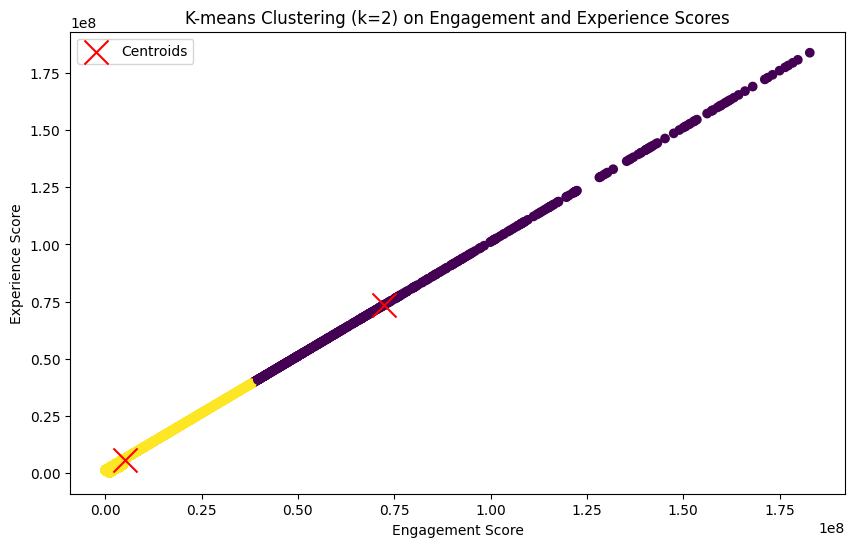

In [73]:
clustering_features = customer_agg[['engagement_score', 'experience_score']]

scaler = StandardScaler()
scaled_clustering_features = scaler.fit_transform(clustering_features)

kmeans = KMeans(n_clusters=2, random_state=42)
customer_agg['Cluster'] = kmeans.fit_predict(scaled_clustering_features)

centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
centroids_customer_agg = pd.DataFrame(centroids, columns=['engagement_score', 'experience_score'])
centroids_customer_agg['cluster_id'] = range(len(centroids))
centroids_customer_agg.to_csv('kmeans_clusters.csv', index=False)

print(customer_agg[['MSISDN/Number', 'engagement_score', 'experience_score', 'Cluster']])

plt.figure(figsize=(10, 6))
plt.scatter(customer_agg['engagement_score'], customer_agg['experience_score'], c=customer_agg['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering (k=2) on Engagement and Experience Scores')
plt.legend()
plt.show()


<span style="font-size: 36px;">Task 4.5</span>

In [74]:

engagement_features = customer_agg[['TCP_retransmission', 'RTT', 'throughput']]

scaler = StandardScaler()
scaled_engagement_features = scaler.fit_transform(engagement_features)

kmeans_engagement = KMeans(n_clusters=3, random_state=42)
customer_agg['Engagement_Cluster'] = kmeans_engagement.fit_predict(scaled_engagement_features)

scaled_experience_features = scaler.transform(engagement_features)
kmeans_experience = KMeans(n_clusters=3, random_state=42)
customer_agg['Experience_Cluster'] = kmeans_experience.fit_predict(scaled_experience_features)

engagement_centroids = kmeans_engagement.cluster_centers_
engagement_centroids = scaler.inverse_transform(engagement_centroids)

experience_centroids = kmeans_experience.cluster_centers_
experience_centroids = scaler.inverse_transform(experience_centroids)

def calculate_score(row, centroid):
    return euclidean(row, centroid)

customer_agg['engagement_score'] = customer_agg[['TCP_retransmission', 'RTT', 'throughput']].apply(
    lambda row: calculate_score(row, engagement_centroids[customer_agg.loc[row.name, 'Engagement_Cluster']]), axis=1)

customer_agg['experience_score'] = customer_agg[['TCP_retransmission', 'RTT', 'throughput']].apply(
    lambda row: calculate_score(row, experience_centroids[customer_agg.loc[row.name, 'Experience_Cluster']]), axis=1)

customer_agg['satisfaction_score'] = (customer_agg['engagement_score'] + customer_agg['experience_score']) / 2

average_scores_per_cluster = customer_agg.groupby('Engagement_Cluster').agg({
    'engagement_score': 'mean',
    'experience_score': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

average_scores_per_cluster.to_csv('average_scores_per_cluster.csv', index=False)

print(average_scores_per_cluster)


   Engagement_Cluster  engagement_score  experience_score  satisfaction_score
0                   0      5.216141e+06      5.216141e+06        5.216141e+06
1                   1      3.319670e+06      3.319670e+06        3.319670e+06
2                   2      3.518571e+06      3.518571e+06        3.518571e+06
